# DecisionTreeClassifier & examples

plot the decision boundaries of VotingClassifier

First, three exemplary classifiers are initialized (DesisionTreeClassifier,KneighborsClassifier, and SVC) and used to initialize a soft-voting VotingClassifier with weights[2,1,2],which means that the predicted probabilities of the exemplary classifiers when the averaged probability is calculated.

Automatically created module for IPython interactive environment


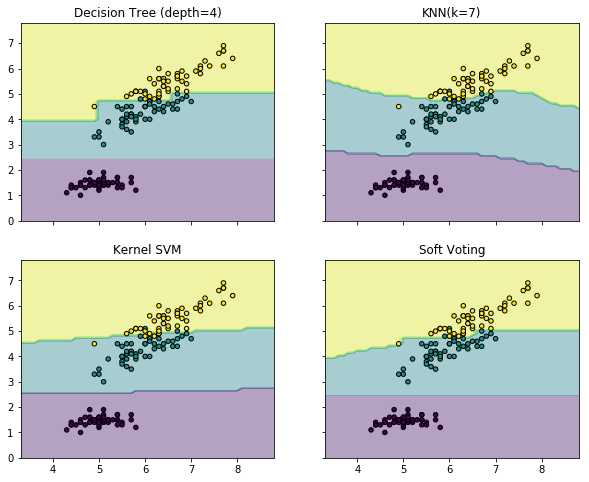

In [5]:
print(__doc__)

from itertools import product 

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some examples
iris = datasets.load_iris()
X = iris.data[:,[0,2]]
y = iris.target

# Training classifier
clf1 = DecisionTreeClassifier(max_depth = 4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma = .1,kernel = 'rbf', probability=True)
eclf = VotingClassifier(estimators = [('dt',clf1),('knn',clf2),('svc',clf3)],voting='soft',weights=[2,1,2])

clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

# Plotting decision regions
x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

f,axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(10,8))

for idx,clf,tt in zip(product([0,1],[0,1]),[clf1,clf2,clf3,eclf],['Decision Tree (depth=4)', 'KNN(k=7)', 'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    
    axarr[idx[0],idx[1]].set_title(tt)
plt.show()

# Two-class Adaboost

This example fits an AdaBoosted decision stump on a non-linearly separable classification dataset composed of two “Gaussian quantiles” clusters (see sklearn.datasets.make_gaussian_quantiles) and plots the decision boundary and decision scores. The distributions of decision scores are shown separately for samples of class A and B. The predicted class label for each sample is determined by the sign of the decision score. Samples with decision scores greater than zero are classified as B, and are otherwise classified as A. The magnitude of a decision score determines the degree of likeness with the predicted class label. Additionally, a new dataset could be constructed containing a desired purity of class B, for example, by only selecting samples with a decision score above some value. 

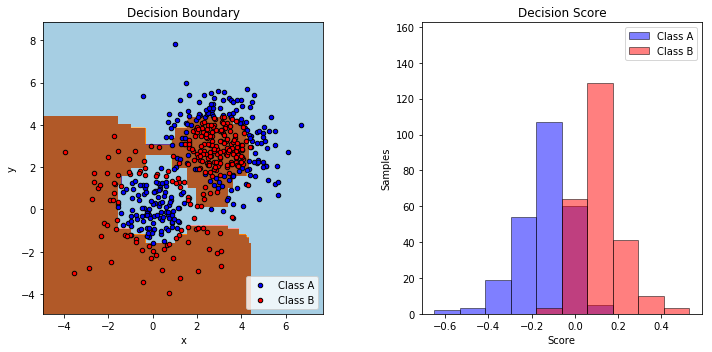

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1,y1 = make_gaussian_quantiles(cov=2.,n_samples = 200,n_features=2,n_classes=2,random_state=1)
X2,y2 = make_gaussian_quantiles(mean=(3,3),cov=1.5,n_samples = 300,n_features=2,n_classes=2,random_state=1)

X = np.concatenate((X1,X2))
y = np.concatenate((y1,-y2+1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm='SAMME',n_estimators=200)
bdt.fit(X,y)
plot_colors = 'br'
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10,5))

# Plot the decision boundaries
plt.subplot(121)
x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
y_min,y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))

Z = bdt.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points 
for i,n,c in zip(range(2),class_names,plot_colors):
    idx = np.where(y==i)
    plt.scatter(X[idx,0],X[idx,1],c=c,cmap=plt.cm.Paired,s=20,edgecolor='k',label = "Class %s"%n)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(),twoclass_output.max())
plt.subplot(122)
for i,n,c in zip(range(2),class_names,plot_colors):
    plt.hist(twoclass_output[y == i], bins=10,range=plot_range,facecolor=c,label="Class %s"%n,alpha=.5,edgecolor='k')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2*1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Score')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()


# Understanding the decision tree structure

the decision tree structure can be analysed to gain further insight on the relation between the features and the target to predict. In this   example, we show how to retrive : 
the binary tree structure; 
the depth of each node and whether or not it's a leaf; 
the nodes that were reached by a sample using the decision_path method; the leaf that was reached by a sample using the apply method;
the rules that were used to predict a sample;
the decision path shared by a group of samples.

In [5]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

estimator = DecisionTreeClassifier(max_leaf_nodes = 3,random_state=0)
estimator.fit(X_train,y_train)

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properities such as the depth of each node and each node and whether or not it is a leaf
node_depth = np.zeros(shape=n_nodes,dtype = np.int64)
is_leaves = np.zeros(shape=n_nodes,dtype=bool)
stack = [(0,-1)] # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id,parent_depth = stack.pop()
    node_depth[node_id] = parent_depth  + 1
    
    # If we have a test node
    if(children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id],parent_depth+1))
        print(stack)
        stack.append((children_right[node_id],parent_depth+1))
        print(stack)
    else:
        is_leaves[node_id] = True
    
print("The binary tree structure has %s nodes and has the following tree structure:"%n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%s node = %s leaf node." % (node_depth[i] * "\t",i))
    else:
        print("%s node = %s test node: go to node %s if X[:,%s] <= %s else to node %s ."% (node_depth[i] * "\t",i,children_left[i],feature[i],threshold[i],children_right[i],))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or a group pf samples .First,let's make it for sample

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id+1]]

print('Rules used to predict sample %s:' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
        
    if(X_test[sample_id,feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"
        
    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)" % (node_id,sample_id,feature[node_id],X_test[sample_id,feature[node_id]],threshold_sign,threshold[node_id]))

# for a group of samples, we have the following common node.
sample_ids = [0,1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids))
common_node_id = np.arange(n_nodes)[common_nodes]                                               
                                                                                                          
print("\n The following samples %s share the node %s in the tree" % (sample_ids,common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id)/n_nodes,))
                                                                                                          

[(1, 0)]
[(1, 0), (2, 0)]
[(1, 0), (3, 1)]
[(1, 0), (3, 1), (4, 1)]
The binary tree structure has 5 nodes and has the following tree structure:
 node = 0 test node: go to node 1 if X[:,3] <= 0.800000011921 else to node 2 .
	 node = 1 leaf node.
	 node = 2 test node: go to node 3 if X[:,2] <= 4.94999980927 else to node 4 .
		 node = 3 leaf node.
		 node = 4 leaf node.

Rules used to predict sample 0:
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011921)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.94999980927)

 The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.


# Plot the decision surface  of a decision tree on the  iris dataset

plot the decision surface of a decision tree trained on pairs of features of the iris dataset.
for each pair of iris features, the decision tree learns decision boundaries made of combinations of sample thresholding rules inferred from the training samples.

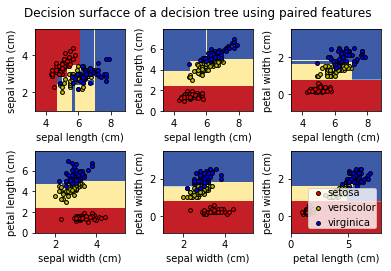

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters 
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    # We only take the two corresponding features
    X = iris.data[:,pair]
    y = iris.target
    
    # Train
    clf = DecisionTreeClassifier().fit(X,y)
    
    # Plot the decision boundary
    plt.subplot(2,3,pairidx+1)
    
    x_min,x_max = X[:,0].min() - 1,X[:,0].max()+1
    y_min,y_max = X[:,1].min() - 1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    # Plot the training points 
    for i,color in zip(range(n_classes),plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap = plt.cm.RdYlBu,edgecolor='black',s=15)
        
plt.suptitle("Decision surfacce of a decision tree using paired features")
plt.legend(loc='lower right',borderpad=0,handletextpad=0)
plt.axis('tight')
plt.show()